In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_excel("DS - Assignment Part 1 data set.xlsx")
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [4]:
df.shape

(414, 9)

In [5]:
df.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


In [6]:
df.isnull().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

In [7]:
df.corr()["House price of unit area"]

Transaction date                            0.087529
House Age                                  -0.210567
Distance from nearest Metro station (km)   -0.673613
Number of convenience stores                0.571005
latitude                                    0.546307
longitude                                   0.523287
Number of bedrooms                          0.050265
House size (sqft)                           0.046489
House price of unit area                    1.000000
Name: House price of unit area, dtype: float64

In [8]:
import math
def age(x):
    h_age = math.modf(x)
    return h_age[1]*12+h_age[0]*10

In [9]:
df["House_Age_Months"]=df["House Age"].map(age)

In [10]:
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area,House_Age_Months
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9,384.0
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2,233.0
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3,159.0
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8,159.0
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1,60.0


In [11]:
df.drop("House Age",inplace=True,axis=1)

In [12]:
df.head()

,Transaction date,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area,House_Age_Months
0,2012.916667,84.87882,10,24.98298,121.54024,1,575,37.9,384.0
1,2012.916667,306.59470,9,24.98034,121.53951,2,1240,42.2,233.0
2,2013.583333,561.98450,5,24.98746,121.54391,3,1060,47.3,159.0
3,2013.500000,561.98450,5,24.98746,121.54391,2,875,54.8,159.0
4,2012.833333,390.56840,5,24.97937,121.54245,1,491,43.1,60.0


# Univariate Analysis using histogram

<AxesSubplot: xlabel='Distance from nearest Metro station (km)', ylabel='Density'>

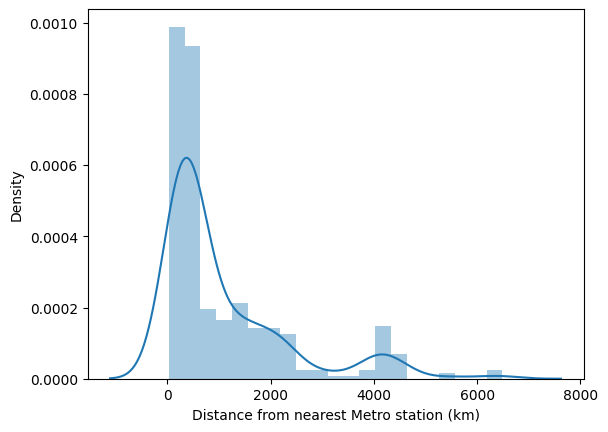

In [13]:
sns.distplot(df["Distance from nearest Metro station (km)"])

<AxesSubplot: >

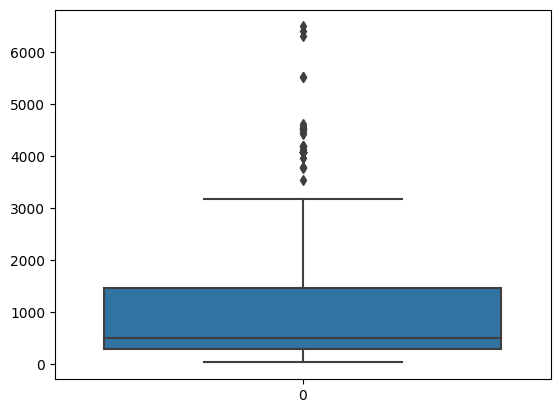

In [15]:
sns.boxplot(df["Distance from nearest Metro station (km)"])

In [16]:
#Detecting outliers #
Q1 = np.percentile(df["Distance from nearest Metro station (km)"], 25,
                   interpolation = 'midpoint')
Q3 = np.percentile(df["Distance from nearest Metro station (km)"], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

lower_fence = Q1-(3*(IQR))
upper_fence = Q3+(3*(IQR))

In [17]:
lower_fence,upper_fence

(-3200.9808, 4943.0656)

In [18]:
outliers=np.where(df["Distance from nearest Metro station (km)"]>5000)

df.drop(outliers[0],inplace=True)

In [19]:
df.shape

(409, 9)

<AxesSubplot: xlabel='Number of convenience stores', ylabel='Density'>

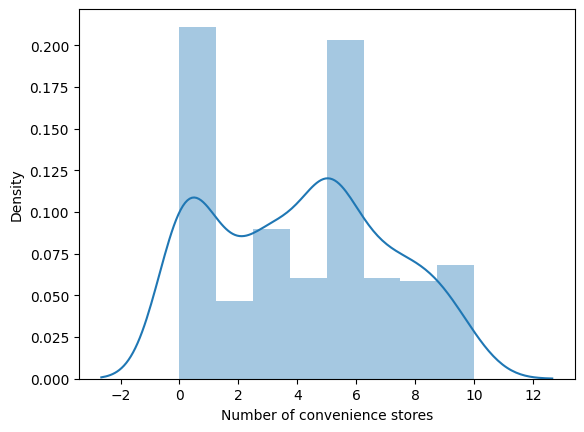

In [20]:
sns.distplot(df["Number of convenience stores"])

<AxesSubplot: >

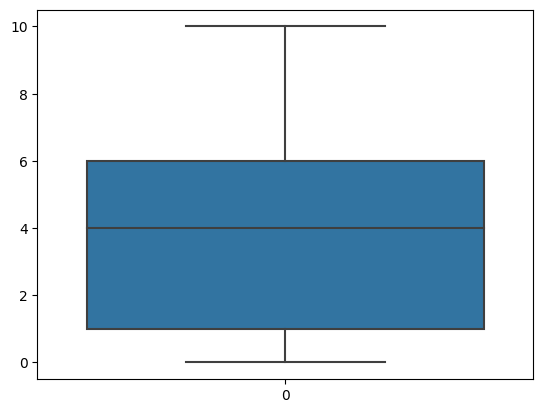

In [22]:
sns.boxplot(df["Number of convenience stores"])

<AxesSubplot: xlabel='Number of bedrooms', ylabel='Density'>

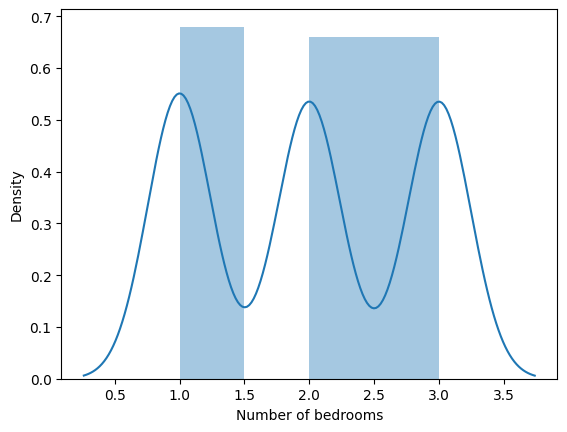

In [23]:
sns.distplot(df["Number of bedrooms"])

<AxesSubplot: xlabel='House size (sqft)', ylabel='Density'>

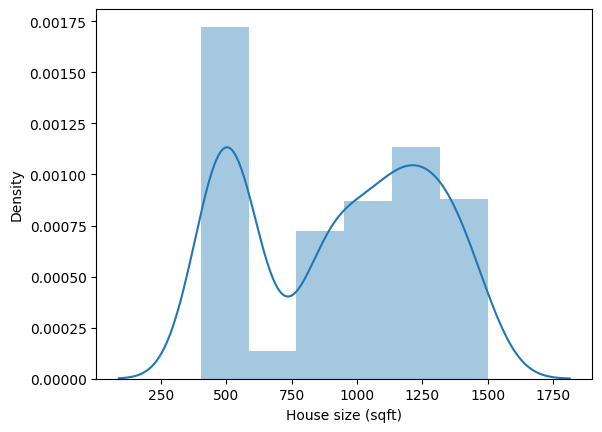

In [24]:
sns.distplot(df["House size (sqft)"])

<AxesSubplot: >

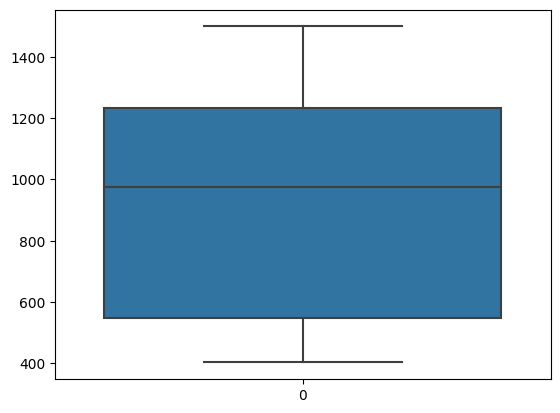

In [25]:
sns.boxplot(df["House size (sqft)"])

<AxesSubplot: xlabel='House price of unit area', ylabel='Density'>

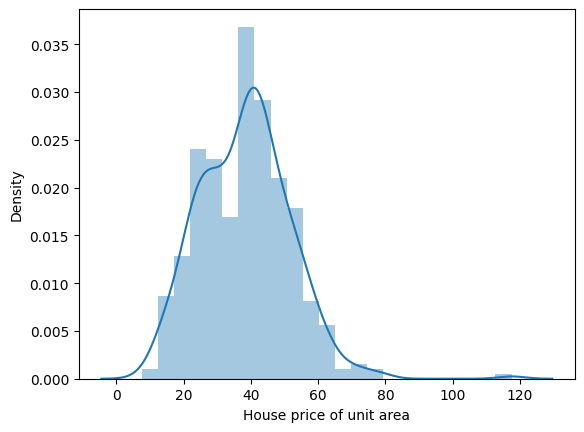

In [26]:
sns.distplot(df["House price of unit area"])

<AxesSubplot: >

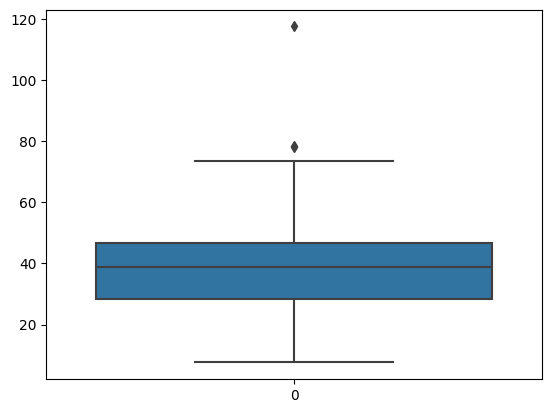

In [27]:
sns.boxplot(df["House price of unit area"])

In [28]:
Q1 = np.percentile(df["House price of unit area"], 25,
                   interpolation = 'midpoint')
Q3 = np.percentile(df["House price of unit area"], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

lower_fence = Q1-(3*(IQR))
upper_fence = Q3+(3*(IQR))

In [29]:
lower_fence,upper_fence

(-26.20000000000001, 101.20000000000002)

In [30]:
outliers=np.where(df["House price of unit area"]>100)

df.drop(outliers[0],inplace=True)

In [31]:
df.shape

(408, 9)

<AxesSubplot: xlabel='House_Age_Months', ylabel='Density'>

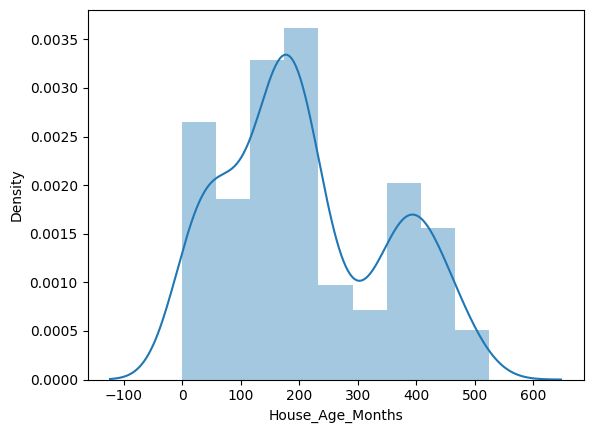

In [32]:
sns.distplot(df["House_Age_Months"])

<AxesSubplot: >

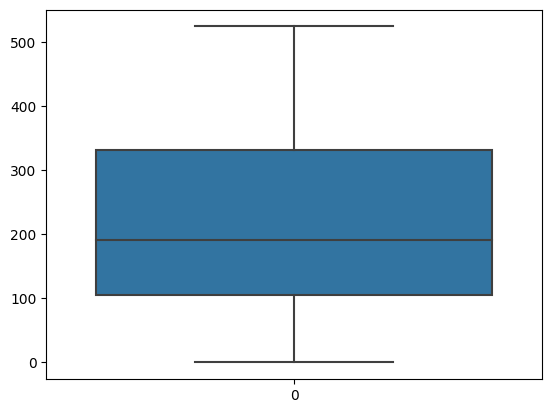

In [33]:
sns.boxplot(df["House_Age_Months"])

<AxesSubplot: >

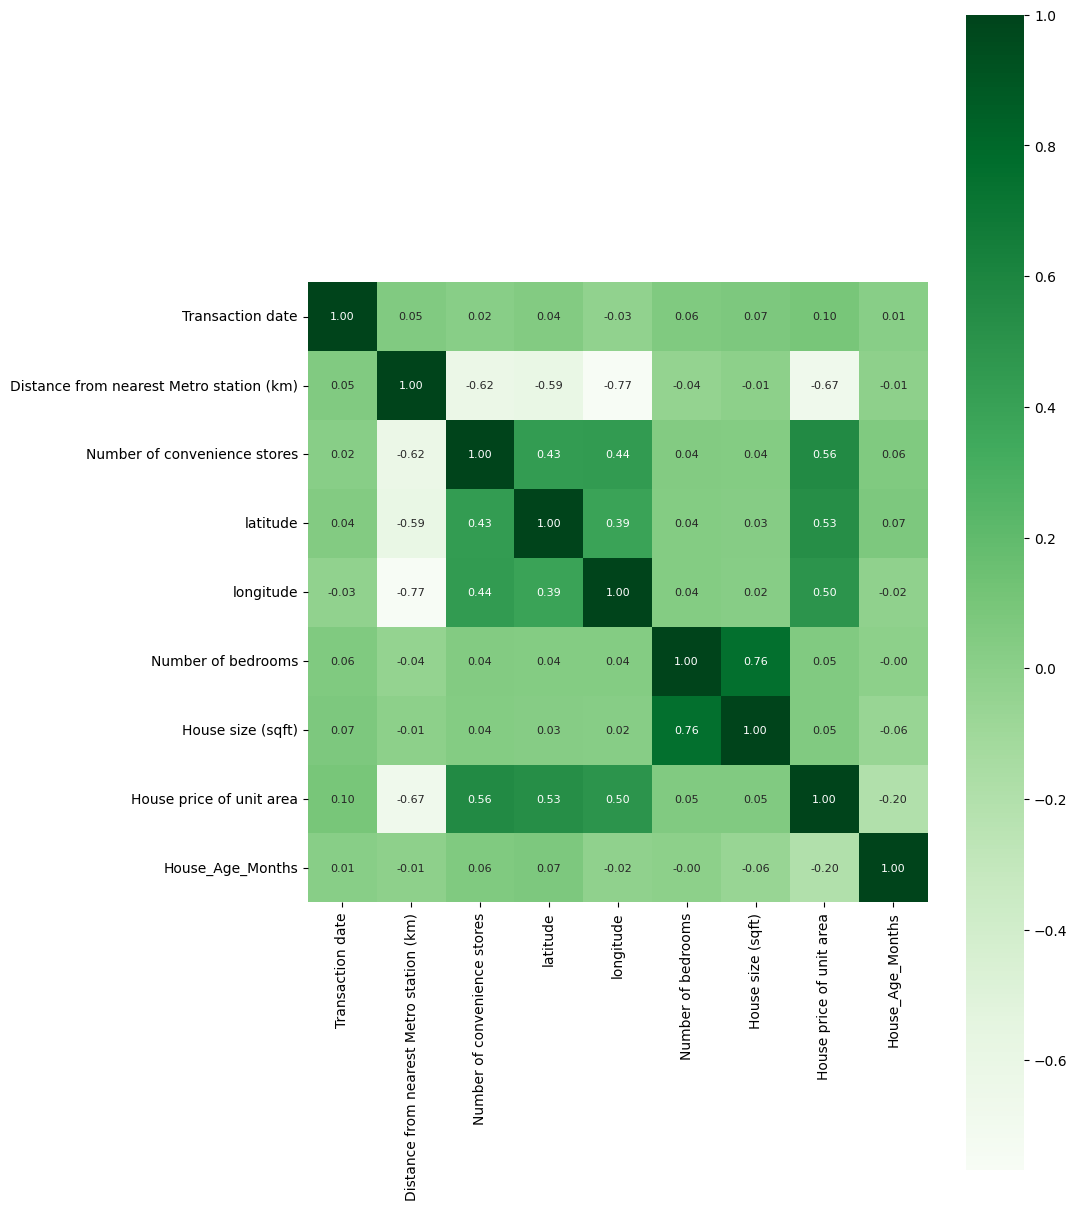

In [35]:
plt.figure(figsize=(10,15))
sns.heatmap(df.corr(), cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size':8}, cmap='Greens')

In [36]:
df.drop(["Number of bedrooms"],inplace=True,axis=1)

In [37]:
df.head()

,Transaction date,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,House size (sqft),House price of unit area,House_Age_Months
0,2012.916667,84.87882,10,24.98298,121.54024,575,37.9,384.0
1,2012.916667,306.59470,9,24.98034,121.53951,1240,42.2,233.0
2,2013.583333,561.98450,5,24.98746,121.54391,1060,47.3,159.0
3,2013.500000,561.98450,5,24.98746,121.54391,875,54.8,159.0
4,2012.833333,390.56840,5,24.97937,121.54245,491,43.1,60.0


In [38]:
x = df.drop("House price of unit area",axis=1)
y = df["House price of unit area"]

In [39]:
x.head()

,Transaction date,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,House size (sqft),House_Age_Months
0,2012.916667,84.87882,10,24.98298,121.54024,575,384.0
1,2012.916667,306.59470,9,24.98034,121.53951,1240,233.0
2,2013.583333,561.98450,5,24.98746,121.54391,1060,159.0
3,2013.500000,561.98450,5,24.98746,121.54391,875,159.0
4,2012.833333,390.56840,5,24.97937,121.54245,491,60.0


In [40]:
y.head()

0    37.9
1    42.2
2    47.3
3    54.8
4    43.1
Name: House price of unit area, dtype: float64

In [41]:
print(x.shape)
print(y.shape)

(408, 7)
(408,)


In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=56)

x_train.shape, x_test.shape

((326, 7), (82, 7))

In [43]:
from sklearn.preprocessing import StandardScaler

In [45]:
scaling=StandardScaler()

In [47]:
scaling.fit(x_train)

StandardScaler()

In [48]:
x_train_scaled = scaling.transform(x_train)
x_test_scaled = scaling.transform(x_test)

In [49]:
x_train_scaled = pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [50]:
x_train_scaled.head()

,Transaction date,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,House size (sqft),House_Age_Months
0,-0.835167,-0.761401,0.326498,-0.313318,0.449411,0.166063,1.984406
1,-0.835167,1.327724,-0.027118,-0.753907,-1.670337,1.121229,0.228013
2,1.259176,1.035263,-0.380733,-0.592695,-1.501041,-1.039402,-1.203122
3,-1.433551,-0.559055,0.326498,0.789844,0.605191,-1.361627,-0.567062
4,1.558367,-0.528221,1.387345,0.494429,0.369031,1.339882,1.261610


In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,r2_score,mean_absolute_error,mean_squared_error
lr=LinearRegression()
lr.fit(x_train_scaled,y_train)
y_pred = lr.predict(x_test_scaled)

print("R2 score",r2_score(y_pred,y_test))
print("MAE",mean_absolute_error(y_pred,y_test))

R2 score 0.7473913264274861
MAE 5.110255580211236


In [52]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=3)
ridge.fit(x_train_scaled,y_train)
y_pred1 = ridge.predict(x_test_scaled)

print("R2 score",r2_score(y_pred1,y_test))
print("MAE",mean_absolute_error(y_pred1,y_test))

R2 score 0.7444817150186354
MAE 5.108733626895004


In [53]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(max_depth=40,random_state=1)
dt.fit(x_train_scaled,y_train)
y_pred1 = dt.predict(x_test_scaled)

print("R2 score",r2_score(y_pred1,y_test))
print("MAE",mean_absolute_error(y_pred1,y_test))

R2 score 0.7498052558335924
MAE 5.324390243902439


In [54]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=3)
knn.fit(x_train_scaled,y_train)
y_pred3 = knn.predict(x_test_scaled)

print("R2 score",r2_score(y_pred3,y_test))
print("MAE",mean_absolute_error(y_pred3,y_test))

R2 score 0.6167033338713945
MAE 5.797154471544714


In [55]:
from sklearn.svm import SVR
svr=SVR(kernel="rbf",C=10,epsilon=0.1)
svr.fit(x_train_scaled,y_train)
y_pred5 = svr.predict(x_test_scaled)

print("R2 score",r2_score(y_pred5,y_test))
print("MAE",mean_absolute_error(y_pred5,y_test))

R2 score 0.7348449054320747
MAE 4.723041895622616


In [56]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=50, random_state=2)
rfr.fit(x_train_scaled,y_train)
y_pred2 = rfr.predict(x_test_scaled)

print("R2 score",r2_score(y_pred2,y_test))
print("MAE",mean_absolute_error(y_pred2,y_test))

R2 score 0.8126568773999969
MAE 4.075048780487807


Random Forest is outperforming with SVR and Decision tree (R2 score is inhance by 3%), bcoz the decision tree model gives high importance to a particular set of features. But the random forest chooses features randomly during the training process.Therefore, it does not depend highly on any specific set of features.

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
param_grid = {'n_estimators': [20,60,100,120], 
              'max_features': [0.2,0.6,1.0],
              'max_depth': [2,8,None],
             'max_samples' : [0.5,0.75,1.0],
             'random_state':[2,3,4,5,6,7]}

In [59]:
grid = GridSearchCV(RandomForestRegressor(), param_grid, refit = True)

In [ ]:
grid.fit(x_train_scaled, y_train)

In [ ]:
grid.best_params_

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=120, random_state=6,max_depth=8,max_features=0.6,max_samples=1.0)
rfr.fit(x_train_scaled,y_train)
y_pred2 = rfr.predict(x_test_scaled)

print("R2 score",r2_score(y_pred2,y_test))
print("MAE",mean_absolute_error(y_pred2,y_test))